In [54]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator


In [55]:
def function_generator(case: int) -> QuantumCircuit:
    """Generate the Deutsch problem oracle circuit."""
    case = case % 4
    f = QuantumCircuit(2)
    if case in [1, 2]: f.cx(0, 1)
    if case in [2, 3]: f.x(1)
    return f

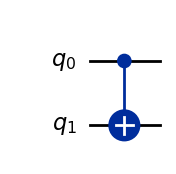

In [56]:
display(function_generator(1).draw(output="mpl"))

In [57]:
def gen_circuit(oracle: QuantumCircuit) -> QuantumCircuit:
    """Compile the Deutsch algorithm circuit with the given oracle."""
    n = oracle.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.barrier()
    qc.compose(oracle, inplace=True)
    qc.barrier()
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [58]:
def deutsch_algorithm(case: int) -> str:
    """Run the Deutsch algorithm for the specified oracle case."""
    oracle = function_generator(case)
    qc = gen_circuit(oracle)
    simulator = AerSimulator()
    result = simulator.run(qc, shots=1, memory=True).result()
    measurement = result.get_memory()[0]
    return "constant" if measurement == "0" else "balanced"

In [59]:
# Example usage:
result = deutsch_algorithm(1)
print(result)

balanced
